<a href="https://colab.research.google.com/github/RDipesh/machine-learning---Loan_prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

******************* **Loan Prediction Based on Customer Behavior** *******************************

**objective:**Analyzing historical customer behavior data, we can predict the likelihood of loan default for new customers. This predictive analysis allows us to determine which customers pose a higher risk and make informed decisions to effectively manage our lending process.


In [ ]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#storing the data into a DataFrame called df
df=pd.read_csv("Training Data.csv")

In [ ]:
#displays the first few rows of the dataframe 'df'.
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#displays total rows and columns in dataframe "df"
df.shape

(252000, 13)



1.   Columns = 13
2.   Rows = 252000



#**EDA**- Exploratory data analysis

### handling missing values





In [ ]:
# isnull. Detect missing values in Dataset
df.isnull().sum()/len(df)*100

Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

In [ ]:
#droping null value in dataset
df.dropna()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
#checking columns present in dataset
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

* income - Income of the user
* age - Age of the user
* experience - Professional experience of the user in years
* profession - Profession
* married - Whether married or single
* house_ownership - Owned or rented or neither
* car_ownership	-  Does the person own a car
* risk_flag - Defaulted on a loan
* current_job_years	- Years of experience in the current job
* current_house_years	- Number of years in the current residence
* city	- City of residence
* state	- State of residence

We should know where we have categorical and numerical data in our dataset



In [ ]:
#We can get a quick look of our data using the df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252000 non-null  float64
 1   Age                252000 non-null  float64
 2   Experience         252000 non-null  float64
 3   Married/Single     252000 non-null  float64
 4   House_Ownership    252000 non-null  float64
 5   Car_Ownership      252000 non-null  float64
 6   Profession         252000 non-null  float64
 7   CURRENT_JOB_YRS    252000 non-null  float64
 8   CURRENT_HOUSE_YRS  252000 non-null  float64
 9   Risk_Flag          252000 non-null  float64
dtypes: float64(10)
memory usage: 19.2 MB


Hence, we can conclude that we have a mixture of categorical as well as numerical data in our dataset. These data can help us to analyze the dataset.


Text(0.5, 1.0, 'Age Count')

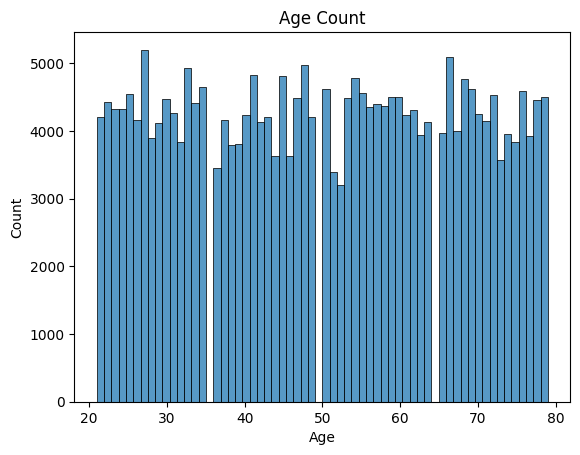

In [ ]:
#Let us check what is the distribution of Age of the people in our dataset
sns.histplot(df.Age)
plt.xlabel("Age")
plt.title("Age Count")

The hist plot shows that the age distribution in our dataset is evenly balanced.

In [ ]:
#Now let us check how many professions do we have in total
df.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

This syntax helps us see the variety of people in the dataset, with different professions, and how they are evenly distributed.


Text(0, 0.5, 'Frequency')

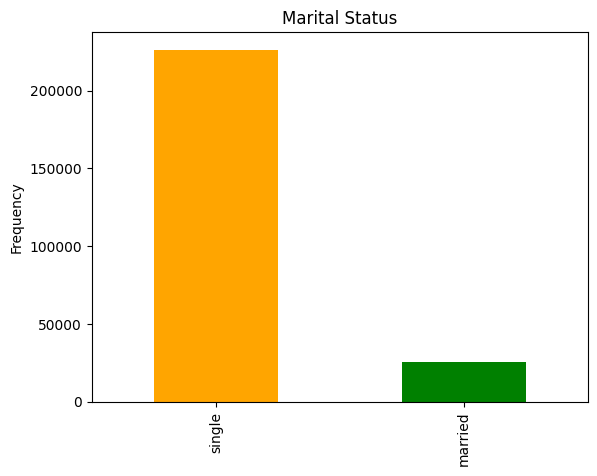

In [ ]:
#let's check the distribution of Marital Status in our dataset
MaritalStatus = df['Married/Single'].value_counts()
MaritalStatus.plot.bar(color=['orange', 'green'])
plt.title("Marital Status")
plt.ylabel("Frequency")

This shows that we have maximum of single Individuals than Married couples in our dataset


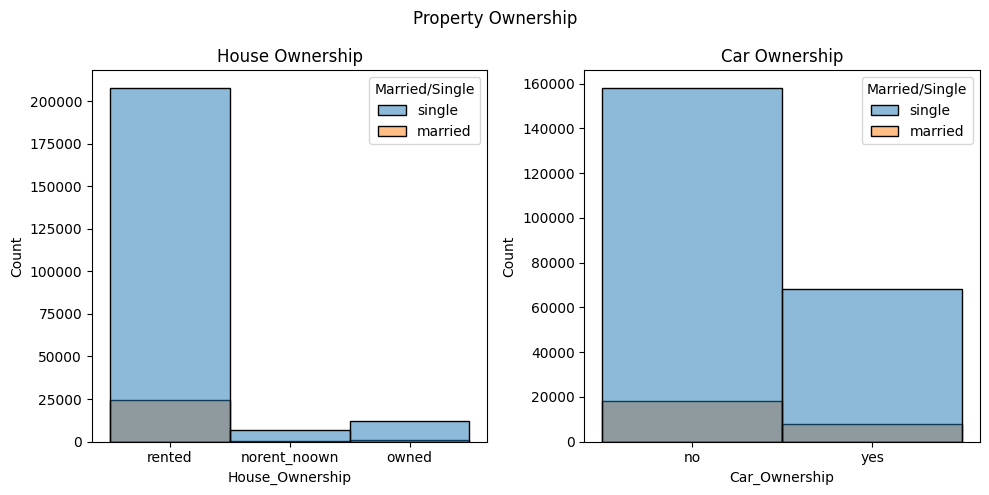

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df, x='House_Ownership', hue='Married/Single', ax=axes[0])
axes[0].set_title('House Ownership')

sns.histplot(data=df, x='Car_Ownership', hue='Married/Single', ax=axes[1])
axes[1].set_title('Car Ownership')

plt.suptitle('Property Ownership')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

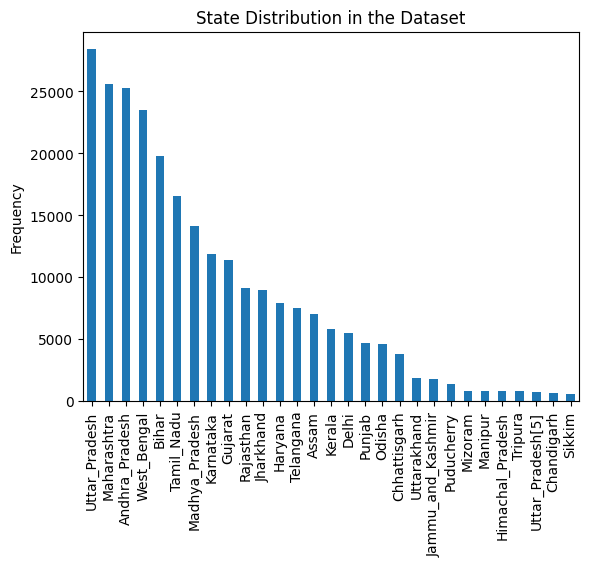

In [ ]:
 #lets check out the distribution of people from various states in our Dataset
 StateDistribution = df.STATE.value_counts()
StateDistribution.plot.bar()
plt.xticks(rotation=90)
plt.title("State Distribution in the Dataset")
plt.ylabel("Frequency")

Here, we see that maximum population are from Uttar Pradesh followed by Maharashtra & Andhra Pradesh


#Handling Outliers


<Axes: >

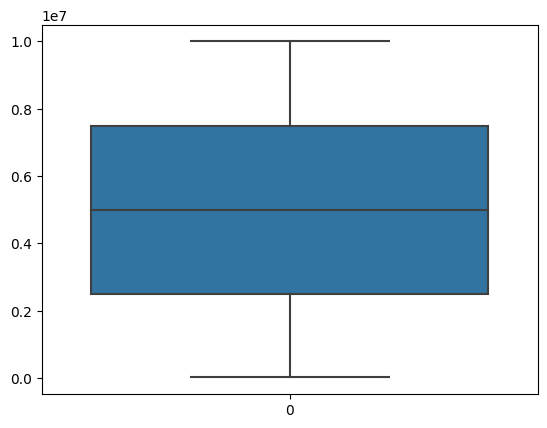

In [ ]:
#Let's check if there exists any possible outliers in Income, as it is the only feature that will have much more importance in our dataset
sns.boxplot(df.Income)

Hence we see that there's no specific Outliers in Income


#Data Preprocessing


In [ ]:
#checking how many categorical variables are in our dataset
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 6


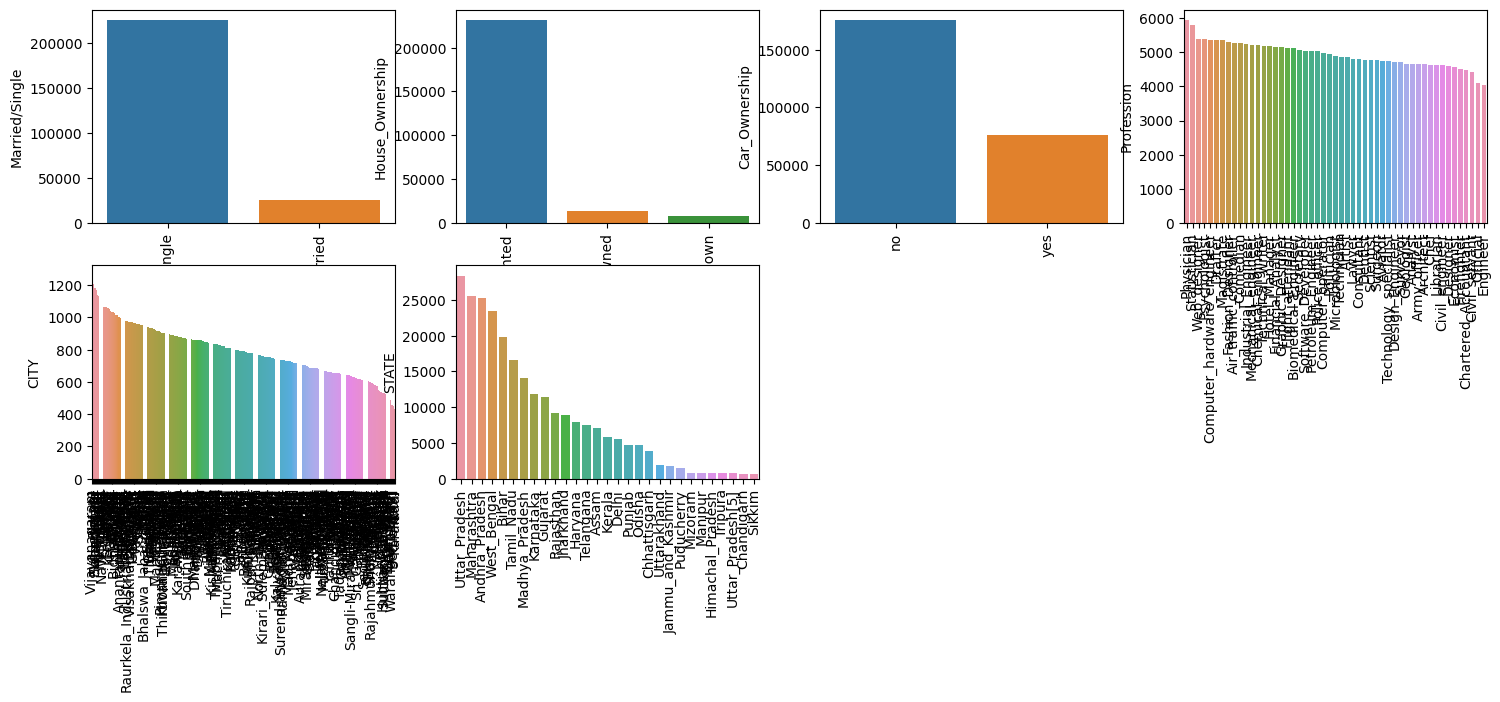

In [ ]:
# ploting bar plot to see categorical variables in 6 columns
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

Encoding categorical Data is one of the important steps in Data Preprocessing

In [ ]:
# importing preprocessing from Sklearn
from sklearn import preprocessing
# Using LabelEncoder to encode our categorical Data
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Let see what Encoding Label Encoder has done to our dataset
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [ ]:
# Let's drop the unnecessary Features
df= df.drop('Id',axis=1)
df= df.drop('CITY',axis=1)
df= df.drop('STATE',axis=1)

In [ ]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1


##Feature Selection

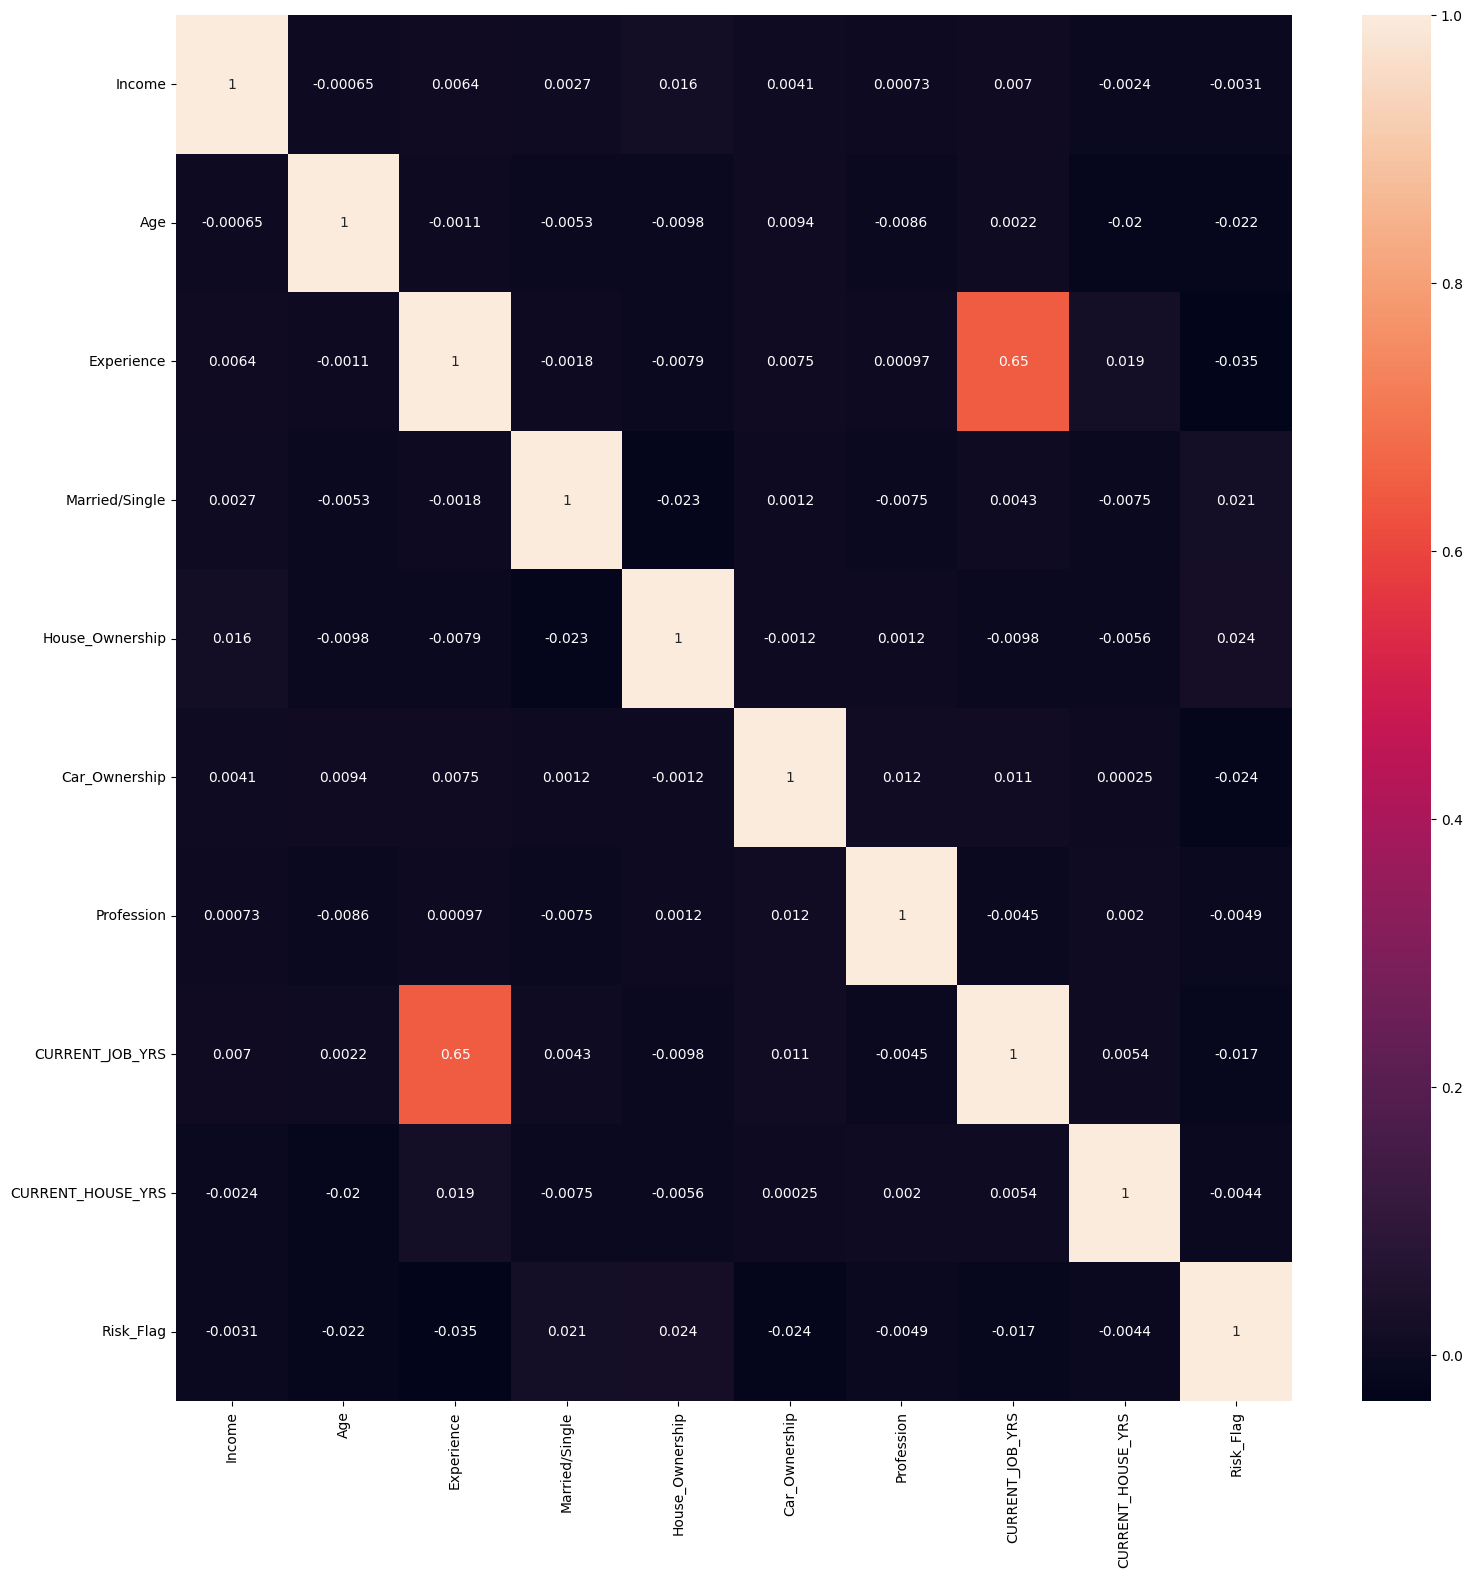

In [ ]:
#Now we will construct a heatmap()
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

##Feature Scaling


In [ ]:
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,14.000000,14.000000,1.000000


Here, we should scale our data as they are not in the same scale

In [ ]:
# Using MinMaxScaler to scale our Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in [df.columns]:
    df[i] = scaler.fit_transform(df[i])
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,0.945861,0.301587,0.505535,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.302774,0.195940,0.458948,0.294571,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,1.000000,0.000000,0.260000,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,1.000000,0.000000,0.520000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,1.000000,1.000000,0.760000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All features are now scaled, moving forward we're left with Modelling and choosing the best Model.


##Modeling

Let's Prepare our Training and Testing Datasets.


In [ ]:
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
#Setting up Training & Testing
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape,y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=1)

In [ ]:
#let see the distrubution of data in Train & Test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((151200, 9), (100800, 9), (151200,), (100800,))

In [ ]:
#importing required Classification model
#knn
from sklearn.neighbors import KNeighborsClassifier
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#SuportVectorClassifier
from sklearn.svm import SVC
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
#making variable for each model
knn = KNeighborsClassifier(n_neighbors=3)#no. of neighbors that will vote for the class of the target point
rfc = RandomForestClassifier(n_estimators = 5,#no. of tree
                             criterion = 'entropy',#a measure of disorder or impurity in a node
                             random_state =7)#controls randomness of the sample
svc = SVC()
lc = LogisticRegression()
bg=BaggingClassifier()
#using for loop for accuracy of y_train on each model
for i in (rfc, knn,lc,bg):
    i.fit(X_train, y_train)
    y_pred = i.predict(X_train)
    print("Accuracy score of ",i.__class__.__name__,"=",100*metrics.accuracy_score(y_train,y_pred))

Accuracy score of  RandomForestClassifier = 93.14087301587301
Accuracy score of  KNeighborsClassifier = 90.40079365079366
Accuracy score of  LogisticRegression = 87.70304232804233
Accuracy score of  BaggingClassifier = 93.36441798941799


In [ ]:
#using for loop for accuracy of y_test on each model
for i in (rfc, knn,lc,bg):
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print("Accuracy score of ",i.__class__.__name__,"=",100*metrics.accuracy_score(y_test,y_pred))

Accuracy score of  RandomForestClassifier = 89.29662698412699
Accuracy score of  KNeighborsClassifier = 88.52083333333334
Accuracy score of  LogisticRegression = 87.6954365079365
Accuracy score of  BaggingClassifier = 89.6170634920635
